In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import ast

In [145]:
games = pd.read_json('./output_steam_games.json', lines=True)

rows_r = []
with open('./australian_user_reviews.json', 'r', encoding='MacRoman') as f:
    for line in f.readlines():
        rows_r.append(ast.literal_eval(line))

reviews = pd.DataFrame(rows_r)

rows_i = []
with open('./australian_users_items.json', 'r', encoding='MacRoman') as f2:
    for line2 in f2.readlines():
        rows_i.append(ast.literal_eval(line2))

items = pd.DataFrame(rows_i)

### Descriptive Statistics

In [5]:
games.describe(include='all')

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
count,24083,28852,32133,30085,32135,30068,31972,32133,31465,30758.00,32135.000000,3.213300e+04,28836
unique,8239,883,32094,30054,32135,3582,15395,32132,4649,162.00,NaN,NaN,10992
top,Ubisoft,[Action],Soundtrack,Soundtrack,http://store.steampowered.com/app/761140/Lost_...,2012-10-16,"[Casual, Simulation]",http://steamcommunity.com/app/612880/reviews/?...,[Single-player],4.99,NaN,NaN,Ubisoft - San Francisco
freq,385,1880,3,3,1,100,1292,2,2794,4278.00,NaN,NaN,1259
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060588,4.517574e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238577,1.827140e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.292800e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4.520600e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,5.934000e+05,NaN


In [6]:
reviews.describe(include='all')

,user_id,user_url,reviews
count,25799,25799,25799
unique,25485,25485,25459
top,76561198027488037,http://steamcommunity.com/profiles/76561198027...,[]
freq,3,3,28


In [7]:
items.describe(include='all')

,user_id,items_count,steam_id,user_url,items
count,88310,88310.000000,88310,88310,88310
unique,87626,NaN,87625,87626,68902
top,X03-Suits,NaN,76561198051777058,http://steamcommunity.com/id/X03-Suits,[]
freq,3,NaN,3,3,16806
mean,NaN,58.353629,NaN,NaN,NaN
std,NaN,122.312095,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN
25%,NaN,3.000000,NaN,NaN,NaN
50%,NaN,26.000000,NaN,NaN,NaN
75%,NaN,73.000000,NaN,NaN,NaN


### Applying header standards

In [146]:
def standardize_header(dataframe):
    dataframe.columns = [c.lower().replace(' ', '_') for c in dataframe.columns]

In [147]:
standardize_header(games)
standardize_header(reviews)
standardize_header(items)

### Data info

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [15]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


### Duplicates

In [148]:
games.duplicated(subset=['app_name', 'id']).sum()

88311

In [149]:
reviews.duplicated(subset=['user_id']).sum()

314

In [150]:
items.duplicated(subset=['user_id', 'steam_id', 'user_url']).sum()

684

In [151]:
games.drop_duplicates(subset=['app_name', 'id'], keep='first', inplace=True)
games.duplicated(subset=['app_name', 'id']).sum()

0

In [152]:
reviews.drop_duplicates(subset=['user_id'], keep='first', inplace=True)
reviews.duplicated(subset=['user_id']).sum()

0

In [153]:
items.drop_duplicates(subset=['user_id', 'steam_id', 'user_url'], keep='first', inplace=True)
items.duplicated(subset=['user_id', 'steam_id', 'user_url']).sum()

0

### NaN Values

In [82]:
games.isna().sum()

publisher       8052
genres          3283
app_name           2
title           2050
url                1
release_date    2067
tags             163
reviews_url        2
specs            670
price           1378
early_access       1
id                 2
developer       3299
dtype: int64

In [5]:
games.shape

(120445, 13)

In [87]:
nulls_percent_games = pd.DataFrame(games.isna().sum()/len(games)).reset_index()
nulls_percent_games.columns = ['column_name', 'nulls_percentage']
nulls_percent_games

,column_name,nulls_percentage
0,publisher,0.250576
1,genres,0.102166
2,app_name,0.000062
3,title,0.063795
4,url,0.000031
5,release_date,0.064324
6,tags,0.005073
7,reviews_url,0.000062
8,specs,0.020850
9,price,0.042883


In [90]:
nan_percentage_games = games.isna().mean().mean() * 100
print(f"Percentage of missing values: {nan_percentage_games:.2f}%")

Percentage of missing values: 5.02%


In [83]:
reviews.isna().sum()

user_id     0
user_url    0
reviews     0
dtype: int64

In [6]:
reviews.shape

(25799, 3)

In [84]:
items.isna().sum()

user_id        0
items_count    0
steam_id       0
user_url       0
items          0
dtype: int64

In [7]:
items.shape

(88310, 5)

<b>Delete duplicates</b>

In [182]:
games_cl = games.dropna(how='all')
games_cl.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290.0,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None


In [155]:
games_cl.shape

(32133, 13)

Column `publisher`

In [183]:
games_cl['publisher'].isna().sum()

8051

In [184]:
games_cl['publisher'] = games_cl['publisher'].fillna('No Info Available')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19540\4262513201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_cl['publisher'] = games_cl['publisher'].fillna('No Info Available')


In [185]:
games_cl['publisher'].isna().sum()

0

Column `genres`

In [186]:
games_cl['genres'].isna().sum()

3282

In [187]:
games_cl['genres'] = games_cl['genres'].apply(lambda x: ['No Info Available'] if x == None else x)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19540\3711512736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_cl['genres'] = games_cl['genres'].apply(lambda x: ['No Info Available'] if x == None else x)


In [188]:
games_cl['genres'].isna().sum()

0

Column `app_name`

In [190]:
games_cl['app_name'].isna().sum()

1

In [191]:
games_cl = games_cl.dropna(subset = 'app_name')

In [192]:
games_cl['app_name'].isna().sum()

0

Column `title`

In [193]:
games_cl['title'].isna().sum()

2048

In [194]:
games_cl[games_cl['title'].isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88314,No Info Available,[No Info Available],Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None
88321,No Info Available,[No Info Available],Icarus Six Sixty Six,None,http://store.steampowered.com/app/724910/Icaru...,None,[Casual],http://steamcommunity.com/app/724910/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",Free,0.0,724910.0,None
88329,No Info Available,[No Info Available],After Life VR,None,http://store.steampowered.com/app/772590/After...,None,"[Early Access, Indie, VR]",http://steamcommunity.com/app/772590/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",4.99,1.0,772590.0,None
88330,No Info Available,[No Info Available],Kitty Hawk,None,http://store.steampowered.com/app/640250/Kitty...,None,"[Early Access, Action, Adventure, Indie, Casual]",http://steamcommunity.com/app/640250/reviews/?...,"[Single-player, Steam Leaderboards, HTC Vive, ...",2.99,1.0,640250.0,None
88332,No Info Available,[No Info Available],Mortars VR,None,http://store.steampowered.com/app/711440/Morta...,None,"[Early Access, Strategy, Action, Indie, Casual...",http://steamcommunity.com/app/711440/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.99,1.0,711440.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120383,No Info Available,[No Info Available],Tank of War-VR,None,http://store.steampowered.com/app/745900/Tank_...,None,"[Action, Massively Multiplayer, Strategy, VR, ...",http://steamcommunity.com/app/745900/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",19.99,0.0,745900.0,None
120386,No Info Available,[No Info Available],Flappy Arms,None,http://store.steampowered.com/app/764110/Flapp...,None,"[Casual, Simulation, VR, Funny, Colorful, Come...",http://steamcommunity.com/app/764110/reviews/?...,"[Single-player, Steam Leaderboards, HTC Vive, ...",1.99,0.0,764110.0,None
120387,No Info Available,[No Info Available],SpaceWalker,None,http://store.steampowered.com/app/705860/Space...,None,"[Early Access, Casual]",http://steamcommunity.com/app/705860/reviews/?...,"[Single-player, HTC Vive, Oculus Rift, Tracked...",Free,1.0,705860.0,None
120395,No Info Available,[No Info Available],LIV Client,None,http://store.steampowered.com/app/755540/LIV_C...,None,"[Video Production, Utilities, Web Publishing]",http://steamcommunity.com/app/755540/reviews/?...,"[Steam Workshop, Steam Cloud, HTC Vive, Oculus...",None,0.0,755540.0,None


In [195]:
games_cl.loc[games_cl['title'].isnull(), 'title'] = games_cl['app_name']

In [196]:
games_cl['title'].isna().sum()

0

Column `url`

In [197]:
games_cl['url'].isna().sum()

0

Column `release_date`

In [198]:
games_cl['release_date'].isna().sum()

2066

In [200]:
games_cl['release_date'] = games_cl['release_date'].fillna('No Info Available')

In [201]:
games_cl['release_date'].isna().sum()

0

Column `tags`

In [203]:
games_cl['tags'].isna().sum()

162

In [204]:
games_cl['tags'] = games_cl['tags'].apply(lambda x: ['No Info Available'] if x == None else x)

In [205]:
games_cl['tags'].isna().sum()

0

Column `reviews_url`

In [210]:
games_cl['reviews_url'].isna().sum()

1

In [211]:
games_cl = games_cl.dropna(subset = 'reviews_url')

In [212]:
games_cl['reviews_url'].isna().sum()

0

Column `specs`

In [214]:
games_cl['specs'].isna().sum()

669

In [215]:
games_cl['specs'] = games_cl['specs'].apply(lambda x: ['No Info Available'] if x == None else x)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19540\3817440727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_cl['specs'] = games_cl['specs'].apply(lambda x: ['No Info Available'] if x == None else x)


In [216]:
games_cl['specs'].isna().sum()

0

Column `price`

In [217]:
games_cl['price'].isna().sum()

1376

In [218]:
games_cl['price'] = games_cl['price'].fillna('Cooming Soon')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19540\2371183452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_cl['price'] = games_cl['price'].fillna('Cooming Soon')


In [219]:
games_cl['price'].isna().sum()

0

Column `early_access`

In [220]:
games_cl['early_access'].isna().sum()

0

Column `id`

In [221]:
games_cl['id'].isna().sum()

0

Column `developer`

In [222]:
games_cl['developer'].isna().sum()

3297

In [224]:
games_cl['developer'] = games_cl['developer'].fillna('No Info Available')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19540\3806861019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_cl['developer'] = games_cl['developer'].fillna('No Info Available')


In [225]:
games_cl['developer'].isna().sum()

0

## Charts

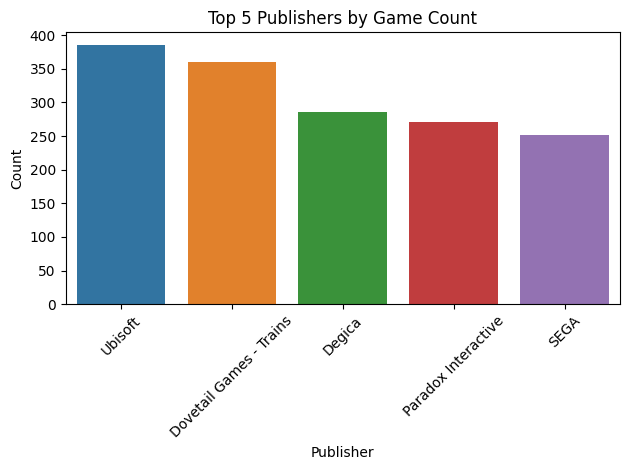

In [226]:
top_publishers = games_cl[games_cl['publisher'] != 'No Info Available']['publisher'].value_counts().head(5)

sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.xticks(rotation=45)  
plt.xlabel('Publisher')  
plt.ylabel('Count')      
plt.title('Top 5 Publishers by Game Count')
plt.tight_layout()
plt.show() 

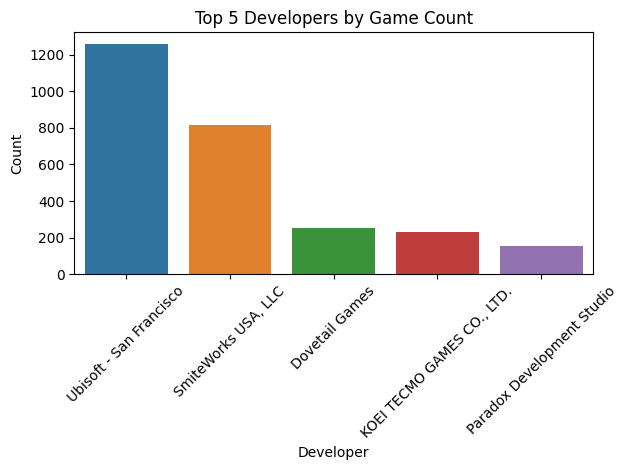

In [227]:
top_developer = games_cl[games_cl['developer'] != 'No Info Available']['developer'].value_counts().head(5)

sns.barplot(x=top_developer.index, y=top_developer.values)
plt.xticks(rotation=45)  
plt.xlabel('Developer')  
plt.ylabel('Count')      
plt.title('Top 5 Developers by Game Count')
plt.tight_layout()
plt.show() 

## Export data

In [228]:
games_cl.to_csv('games.csv', index = False)

In [143]:
reviews.to_csv('reviews.csv', index = False)

In [144]:
items.to_csv('items.csv', index = False)